Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [6]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [7]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

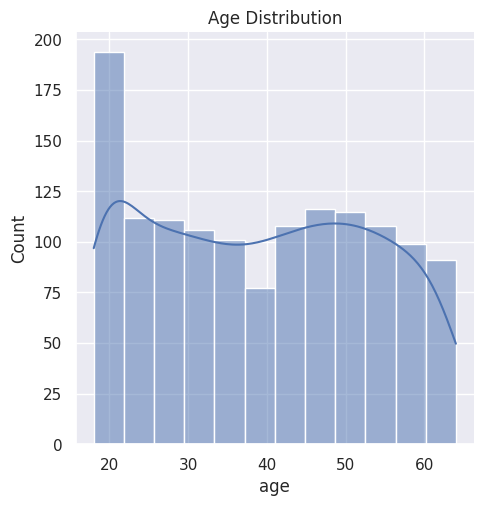

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(6, 6))
sns.displot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

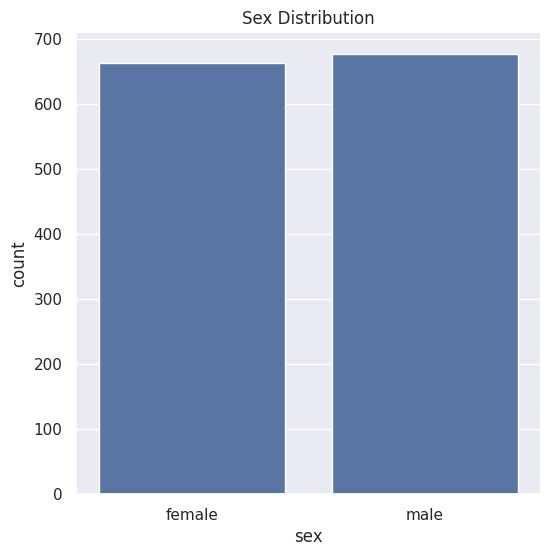

In [9]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

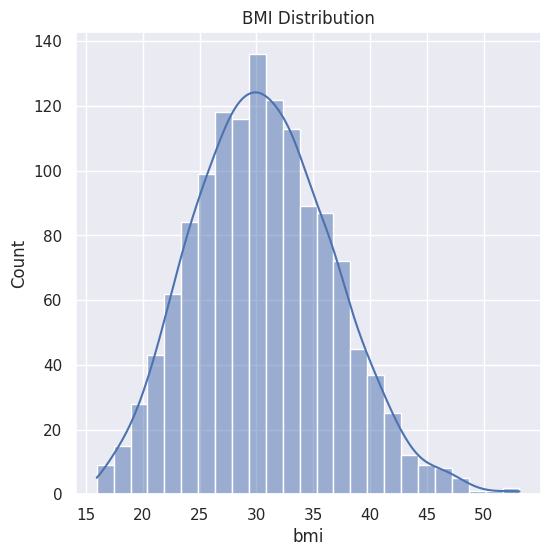

In [11]:
sns.set()
plt.figure(figsize=(6, 6))
sns.histplot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()


Normal BMI Range --> 18.5 to 24.9

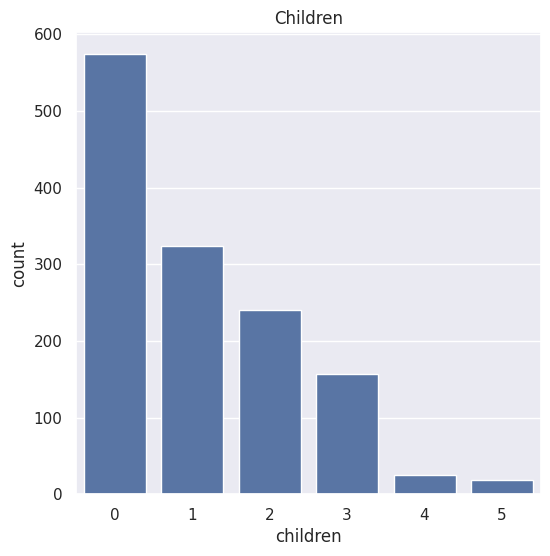

In [12]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

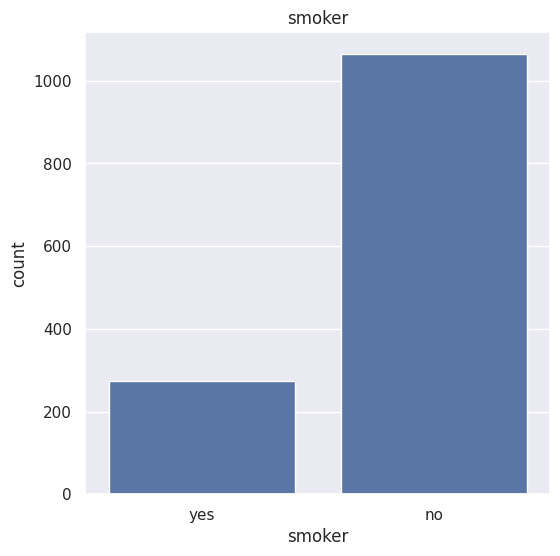

In [14]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

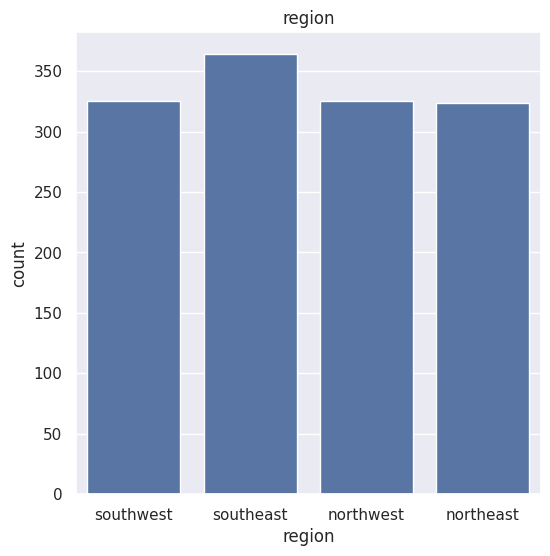

In [16]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

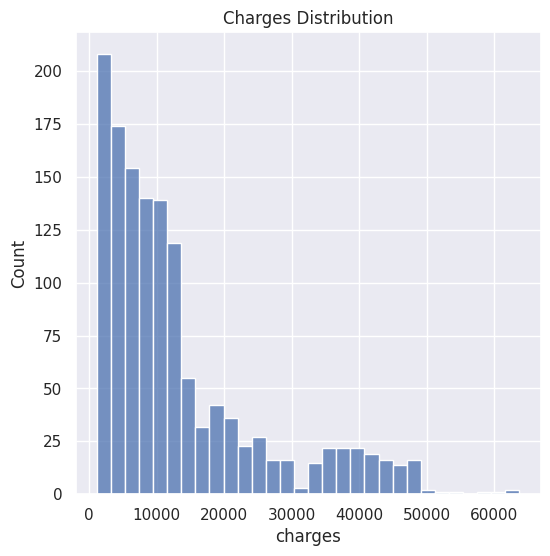

In [18]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [19]:
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

Splitting the Features and Target

In [20]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [21]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [22]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# List of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=5),
    xgb.XGBRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)


    print(f"{model.__class__.__name__} Metrics:")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print()

LinearRegression Metrics:
MAE: 4190.220190137914
MSE: 33685623.354144424
RMSE: 5803.931715151758
R2 Score: 0.783021587162344

Lasso Metrics:
MAE: 4190.304762072234
MSE: 33686108.69600261
RMSE: 5803.9735264732735
R2 Score: 0.7830184609412566

Ridge Metrics:
MAE: 4202.909201690057
MSE: 33730428.950244345
RMSE: 5807.79036727776
R2 Score: 0.7827329819307948

DecisionTreeRegressor Metrics:
MAE: 3374.4169351343285
MSE: 48420848.84748373
RMSE: 6958.5090966013495
R2 Score: 0.688107926021608

RandomForestRegressor Metrics:
MAE: 2522.3492841640464
MSE: 21201642.753032904
RMSE: 4604.524161412654
R2 Score: 0.8634343575673186

SVR Metrics:
MAE: 6452.964034967875
MSE: 166287735.19879937
RMSE: 12895.260183447226
R2 Score: -0.07110527474815997

KNeighborsRegressor Metrics:
MAE: 8103.768074220149
MSE: 137555031.566095
RMSE: 11728.38571867821
R2 Score: 0.11397001286684316

XGBRegressor Metrics:
MAE: 2719.986046608826
MSE: 24128510.58168258
RMSE: 4912.078030903273
R2 Score: 0.8445815927136182



**Converting Regression to Classification**

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert regression into classification by binning target variable
num_classes = 3
bins = np.linspace(Y_train.min(), Y_train.max(), num_classes + 1)
Y_train_class = np.digitize(Y_train, bins)
Y_test_class = np.digitize(Y_test, bins)

# Initialize lists to store classification metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_pred_class = np.digitize(y_pred, bins)

    # Calculate classification metrics
    accuracy = accuracy_score(Y_test_class, y_pred_class)
    precision = precision_score(Y_test_class, y_pred_class, average='weighted', zero_division=1)
    recall = recall_score(Y_test_class, y_pred_class, average='weighted', zero_division=1)
    f1 = f1_score(Y_test_class, y_pred_class, average='weighted')

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print model name and metrics
    print(f"{model.__class__.__name__} Classification Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

LinearRegression Classification Metrics:
Accuracy: 0.8470149253731343
Precision: 0.8942387421865033
Recall: 0.8470149253731343
F1 Score: 0.8400662183654422

Lasso Classification Metrics:
Accuracy: 0.8470149253731343
Precision: 0.8942387421865033
Recall: 0.8470149253731343
F1 Score: 0.8400662183654422

Ridge Classification Metrics:
Accuracy: 0.8470149253731343
Precision: 0.8942387421865033
Recall: 0.8470149253731343
F1 Score: 0.8400662183654422

DecisionTreeRegressor Classification Metrics:
Accuracy: 0.8731343283582089
Precision: 0.8800195451314854
Recall: 0.8731343283582089
F1 Score: 0.8743702869301292

RandomForestRegressor Classification Metrics:
Accuracy: 0.9216417910447762
Precision: 0.9191970457362176
Recall: 0.9216417910447762
F1 Score: 0.9157833795084344

SVR Classification Metrics:
Accuracy: 0.7985074626865671
Precision: 0.8391067052795723
Recall: 0.7985074626865671
F1 Score: 0.7090481203938812

KNeighborsRegressor Classification Metrics:
Accuracy: 0.7649253731343284
Precision:

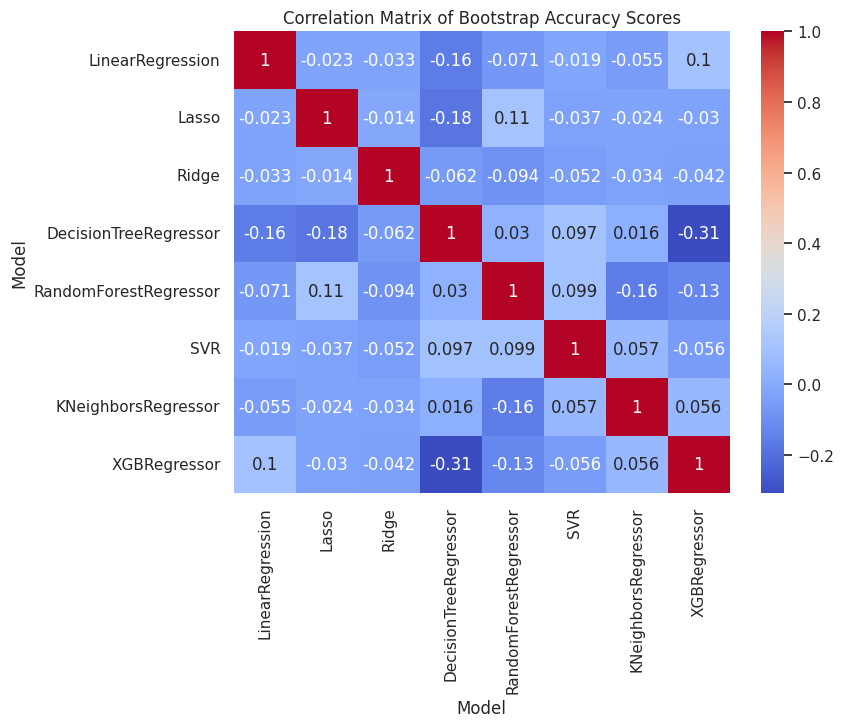

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# Initialize lists to store bootstrap accuracies for each model
bootstrap_accuracies = []

# Define the number of bootstrap iterations
num_bootstrap = 100

# Perform bootstrapping for each model
for model in models:
    model_bootstrap_accuracies = []
    for _ in range(num_bootstrap):
        # Bootstrap resampling
        X_train_resampled, Y_train_resampled = resample(X_train, Y_train, replace=True)
        # Train the model
        model.fit(X_train_resampled, Y_train_resampled)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Convert predictions to discrete classes (binning)
        y_pred_discrete = np.digitize(y_pred, bins=np.arange(np.min(Y_train), np.max(Y_train), step=1))
        # Convert true labels to discrete classes (binning)
        Y_test_discrete = np.digitize(Y_test, bins=np.arange(np.min(Y_train), np.max(Y_train), step=1))
        # Calculate accuracy and append to the list
        accuracy = accuracy_score(Y_test_discrete, y_pred_discrete)
        model_bootstrap_accuracies.append(accuracy)
    bootstrap_accuracies.append(model_bootstrap_accuracies)

# 1. Uncertainty of Each Model with Bootstrapping
uncertainties = [np.std(bootstrap_accuracies[i]) for i in range(len(models))]

# 2. Plot Correlation Matrix
correlation_matrix = np.corrcoef(bootstrap_accuracies)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=[model.__class__.__name__ for model in models], yticklabels=[model.__class__.__name__ for model in models])
plt.title('Correlation Matrix of Bootstrap Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Model')
plt.show()

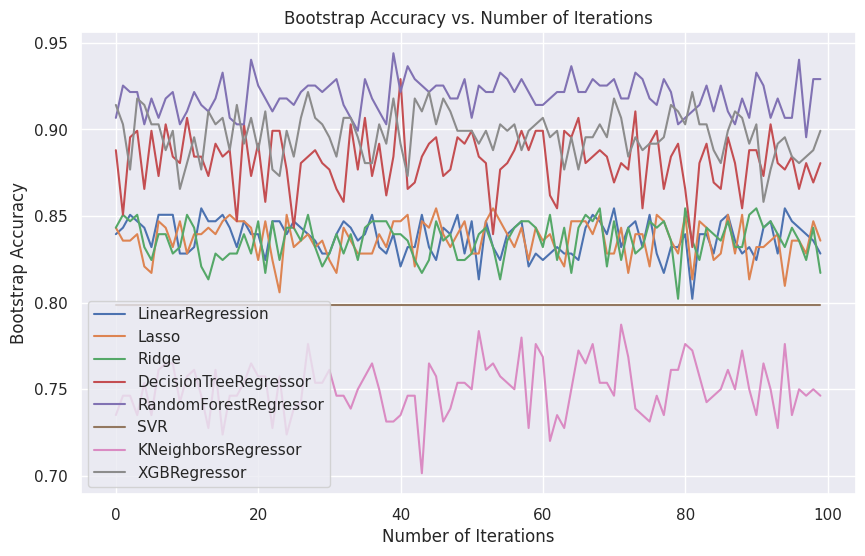

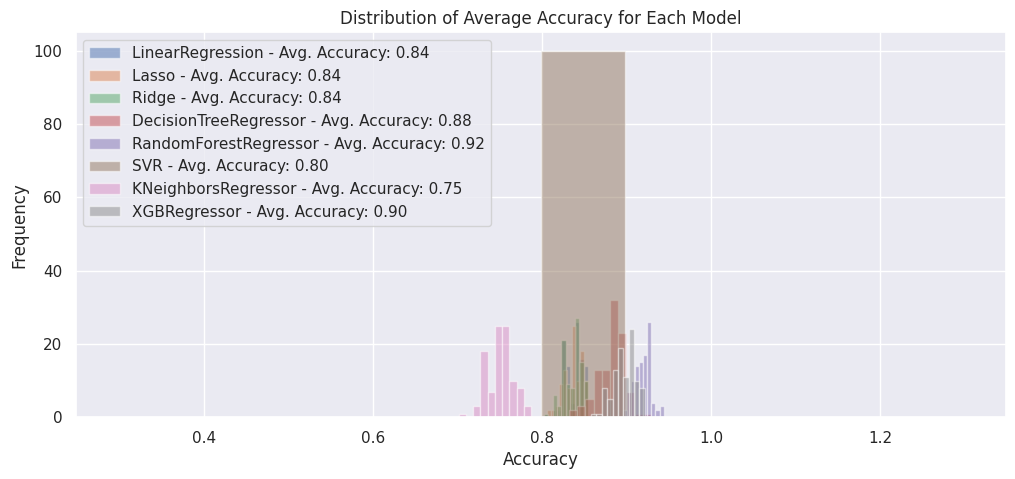

In [26]:
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Define the number of bootstrap iterations
num_bootstrap = 100

# Initialize lists to store bootstrap accuracies and average accuracies for each model
bootstrap_accuracies = []
average_accuracies = []

# Perform bootstrapping for each model
for model in models:
    model_bootstrap_accuracies = []
    model_average_accuracies = []
    for _ in range(num_bootstrap):
        X_train_resampled, Y_train_resampled = resample(X_train, Y_train, replace=True)
        # Train the model
        model.fit(X_train_resampled, Y_train_resampled)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Convert predictions to discrete classes using the same bins
        y_pred_class = np.digitize(y_pred, bins)
        # Calculate accuracy and append to the list
        accuracy = accuracy_score(Y_test_class, y_pred_class)
        model_bootstrap_accuracies.append(accuracy)
        # Calculate accuracy for the current iteration
        iteration_accuracy = accuracy_score(Y_test_class, y_pred_class)
        model_average_accuracies.append(iteration_accuracy)
    bootstrap_accuracies.append(model_bootstrap_accuracies)
    average_accuracies.append(model_average_accuracies)


# Plot the average accuracy for each model
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.plot(range(num_bootstrap), bootstrap_accuracies[i], label=model.__class__.__name__)
plt.xlabel('Number of Iterations')
plt.ylabel('Bootstrap Accuracy')
plt.title('Bootstrap Accuracy vs. Number of Iterations')
plt.legend()
plt.show()

# Plot the distribution of average accuracy for each model
plt.figure(figsize=(12, 5))
for i, model in enumerate(models):
    avg_accuracy = np.mean(average_accuracies[i])
    plt.hist(average_accuracies[i], bins=10, alpha=0.5, label=f'{model.__class__.__name__} - Avg. Accuracy: {avg_accuracy:.2f}')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Average Accuracy for Each Model')
plt.legend()
plt.show()


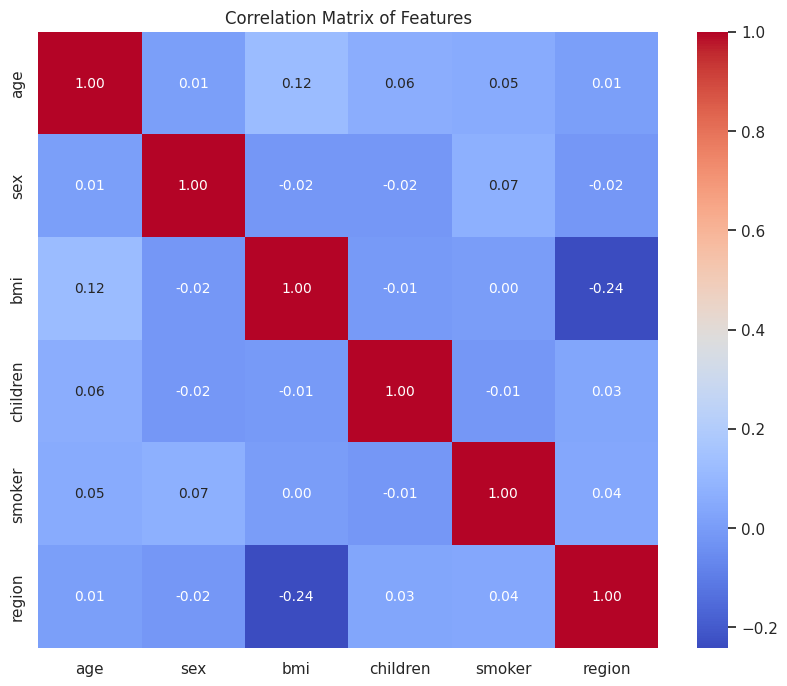

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix of Features")
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# List of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=5),
    xgb.XGBRegressor()
]

# Evaluation metrics
metrics = {'Model': [], 'MSE': [], 'MAE': [], 'RMSE': [], 'R2 Score': []}

# Train and evaluate each model
for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)

    # Append model name and metrics to the dictionary
    metrics['Model'].append(model.__class__.__name__)
    metrics['MSE'].append(mse)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)
    metrics['R2 Score'].append(r2)



([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'LinearRegression'),
  Text(1, 0, 'Lasso'),
  Text(2, 0, 'Ridge'),
  Text(3, 0, 'DecisionTreeRegressor'),
  Text(4, 0, 'RandomForestRegressor'),
  Text(5, 0, 'SVR'),
  Text(6, 0, 'KNeighborsRegressor'),
  Text(7, 0, 'XGBRegressor')])

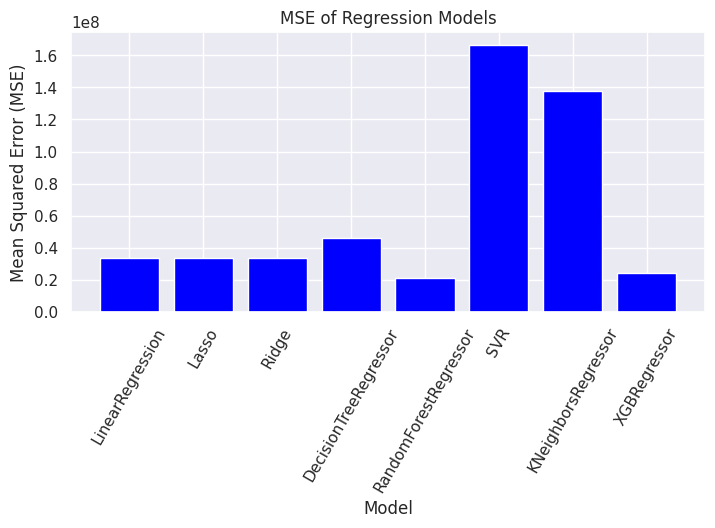

In [29]:
# Convert metrics dictionary to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(18, 8))  # Increased figure width

# Plot MSE
plt.subplot(2, 2, 1)
plt.bar(metrics_df['Model'], metrics_df['MSE'], color='blue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE of Regression Models')
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'LinearRegression'),
  Text(1, 0, 'Lasso'),
  Text(2, 0, 'Ridge'),
  Text(3, 0, 'DecisionTreeRegressor'),
  Text(4, 0, 'RandomForestRegressor'),
  Text(5, 0, 'SVR'),
  Text(6, 0, 'KNeighborsRegressor'),
  Text(7, 0, 'XGBRegressor')])

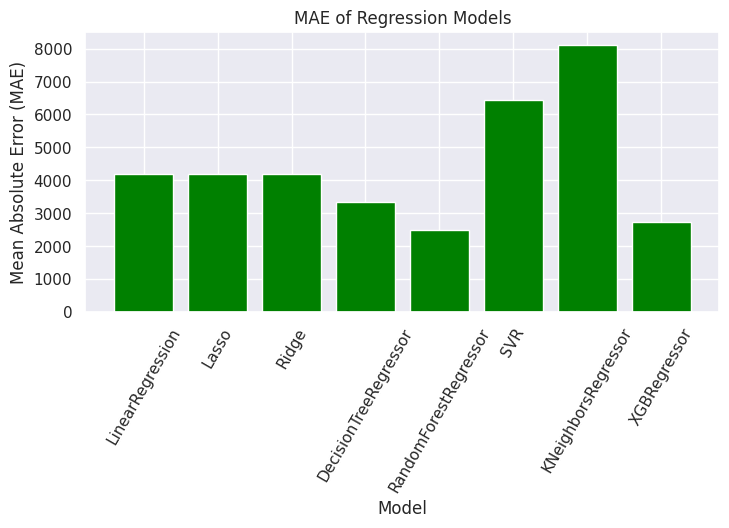

In [30]:
# Plot MAE
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 2)
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='green')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE of Regression Models')
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'LinearRegression'),
  Text(1, 0, 'Lasso'),
  Text(2, 0, 'Ridge'),
  Text(3, 0, 'DecisionTreeRegressor'),
  Text(4, 0, 'RandomForestRegressor'),
  Text(5, 0, 'SVR'),
  Text(6, 0, 'KNeighborsRegressor'),
  Text(7, 0, 'XGBRegressor')])

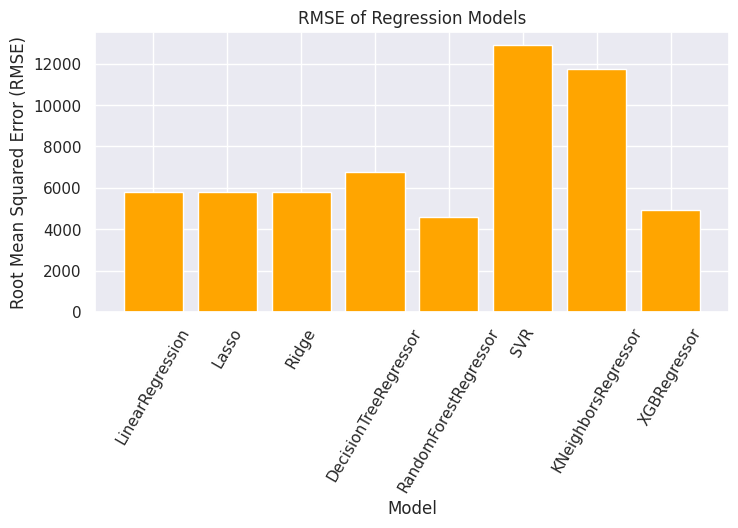

In [31]:
# Plot RMSE
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 3)
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='orange')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE of Regression Models')
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'LinearRegression'),
  Text(1, 0, 'Lasso'),
  Text(2, 0, 'Ridge'),
  Text(3, 0, 'DecisionTreeRegressor'),
  Text(4, 0, 'RandomForestRegressor'),
  Text(5, 0, 'SVR'),
  Text(6, 0, 'KNeighborsRegressor'),
  Text(7, 0, 'XGBRegressor')])

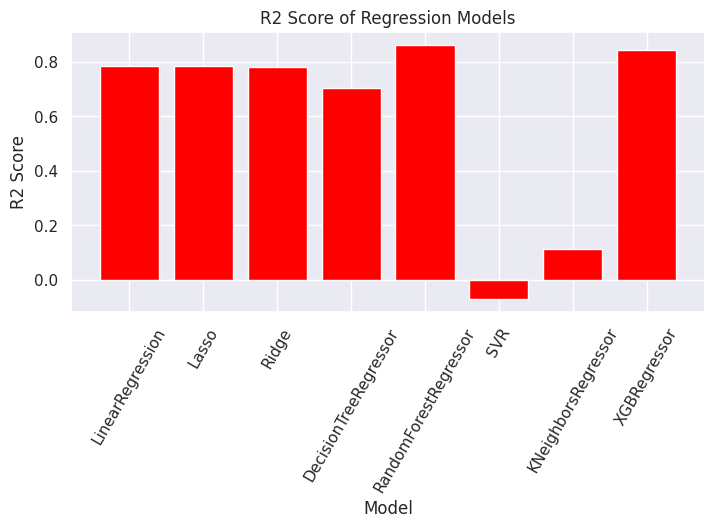

In [32]:
# Plot R2 Score
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 4)
plt.bar(metrics_df['Model'], metrics_df['R2 Score'], color='red')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score of Regression Models')
plt.xticks(rotation=60)  # Rotate x-axis labels further

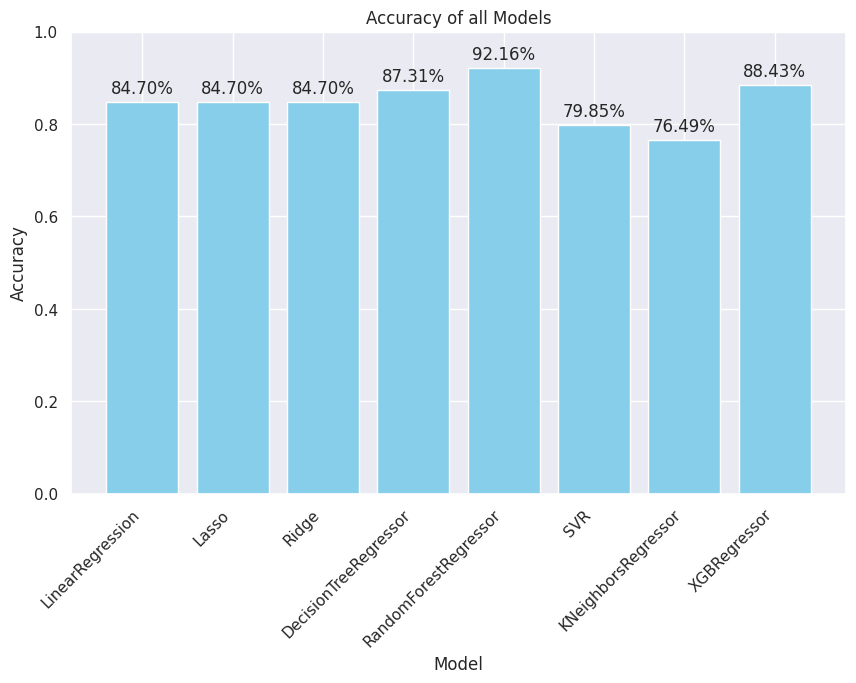

In [33]:
import matplotlib.pyplot as plt

# Extract model names for plotting
model_names = [model.__class__.__name__ for model in models]

# Plot accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')

# Add labels to each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.01,
             f'{accuracy:.2%}',
             ha='center',
             va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of all Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()


Building a Predictive System

In [34]:
for model in models:
    if isinstance(model, DecisionTreeRegressor):
        print(model)
        # input_data = (31,1,25.74,0,1,0)
        input_data=(28,0,33.000,3,1,0)
        #input_data = (19, 1, 27.900, 0, 0, 1)

        # changing input_data to a numpy array
        input_data_as_numpy_array = np.asarray(input_data)

        # reshape the array
        input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

        prediction = model.predict(input_data_reshaped)
        print(prediction)

        print('The insurance cost is USD ', prediction[0])


for model in models:
    if isinstance(model, RandomForestRegressor):
        print(model)
        # input_data = (31,1,25.74,0,1,0)
        input_data=(28,0,33.000,3,1,0)
        # input_data = (19, 1, 27.900, 0, 0, 1)

        # changing input_data to a numpy array
        input_data_as_numpy_array = np.asarray(input_data)

        # reshape the array
        input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

        prediction = model.predict(input_data_reshaped)
        print(prediction)

        print('The insurance cost is USD ', prediction[0])


DecisionTreeRegressor()
[4449.462]
The insurance cost is USD  4449.462
RandomForestRegressor()
[4419.848141]
The insurance cost is USD  4419.848141


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


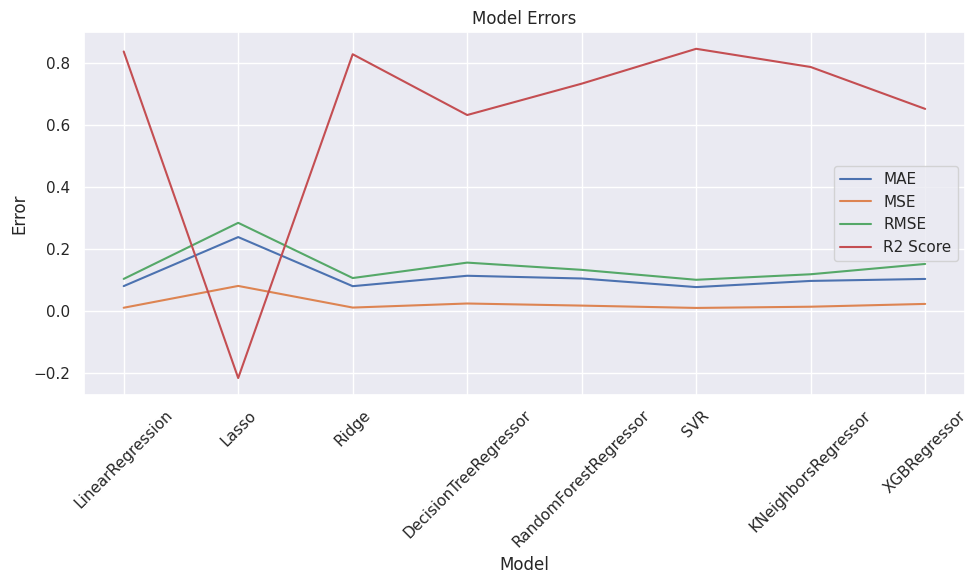

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Generate synthetic time-series data
X = np.random.rand(100, 1)  # Features
Y = np.sin(X).ravel() + np.random.normal(0, 0.1, 100)  # Target

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# List of regression models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=5),
    xgb.XGBRegressor()
]

# Initialize lists to store errors for each model
mae_list, mse_list, rmse_list, r2_list = [], [], [], []

# Train and evaluate each model
for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)

    # Append errors to lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plotting errors over time
plt.figure(figsize=(10, 6))
models_names = [model.__class__.__name__ for model in models]

plt.plot(models_names, mae_list, label='MAE')
plt.plot(models_names, mse_list, label='MSE')
plt.plot(models_names, rmse_list, label='RMSE')
plt.plot(models_names, r2_list, label='R2 Score')

plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Model Errors')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
